## **Transition to Modeling**

With the data preparation phase completed, the dataset is now structured, cleaned, and ready for predictive analysis. All variables are in numeric format, irrelevant columns have been removed, and the target variable has been properly defined.

At this stage, the focus shifts from data validation to pattern learning. The objective now is to build classification models that can identify relationships between employee characteristics and attrition outcomes.

Before training any model, the dataset will be separated into features (independent variables) and the target variable (Attrition). A training and testing split will then be applied to ensure that model evaluation reflects performance on unseen data.

Given the observed class imbalance, model evaluation will go beyond accuracy and will emphasize metrics such as precision, recall, and F1-score to provide a more balanced assessment of predictive performance.

The next section begins the modeling phase, starting with a baseline classification model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load dataset
df = pd.read_csv('HR-Employee-Attrition-Cleaned.csv')
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


In [3]:
#checking  data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

In [4]:
#checking for any correlating features with the target varaible
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                           -0.031373
EducationField_Life Sciences      

## **Feature and Target Separation**

At this stage, the dataset is fully prepared and numeric. The next step is to separate the independent variables (features) from the dependent variable (Attrition).

The target variable represents employee attrition, while all other columns serve as predictors.

In [5]:
# Creating the X and Y features
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X.shape, y.shape


((1470, 44), (1470,))

## **Train–Test Split**

With the dataset fully prepared and verified to be free of leakage, the next step is to divide the data into training and testing sets. This ensures that model performance is evaluated on unseen data rather than the same data used for learning.

An 80–20 split is applied, where 80% of the data is used for training and 20% is reserved for testing. Since the target variable shows class imbalance, stratification is applied to preserve the original class distribution in both subsets.

In [6]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

## **Feature Scaling**

Although all features are numeric after encoding, not all of them represent continuous measurements. Some columns are binary indicators created through one-hot encoding (True/False), while others are actual continuous variables such as Age, MonthlyIncome, and TotalWorkingYears.

Since Logistic Regression is sensitive to feature scale, only the continuous numerical variables were standardized using StandardScaler. Binary indicator variables were left unchanged because they already exist on a comparable 0–1 scale and do not require scaling.

The scaler was fitted on the training data and then applied to the test data to prevent data leakage.

Tree-based models will use the unscaled dataset, as they are not affected by feature magnitude.

In [7]:
# scaling continous features
continous_cols = ['Age',
                  'DailyRate',
                  'DistanceFromHome',
                  'HourlyRate',
                  'MonthlyIncome',
                  'MonthlyRate',
                  'NumCompaniesWorked',
                  'PercentSalaryHike',
                  'TotalWorkingYears',
                  'TrainingTimesLastYear',
                  'YearsAtCompany',
                  'YearsInCurrentRole',
                  'YearsSinceLastPromotion',
                  'YearsWithCurrManager']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#keep original for tree-based
X_train_unscaled = X_train.copy()
X_test_unscaled = X_test.copy()

#scale for logistics regression
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continous_cols] = scaler.fit_transform(X_train[continous_cols])
X_test_scaled[continous_cols] = scaler.transform(X_test[continous_cols])


## **Modeling Phase**

After preprocessing and splitting the dataset, the next step is to train classification models to predict employee attrition.

Since this is a binary classification problem, we begin with **Logistic Regression as a baseline model**. Scaled data will be used for Logistic Regression because it is sensitive to feature magnitude, while tree-based models will use the unscaled dataset.

This approach ensures proper preprocessing and fair model comparison.

### Logistic Regression (Without Class Weight)

We first train a standard Logistic Regression model without adjusting for class imbalance. In this setup, the model treats both classes equally and learns from the data as it is distributed. This serves as a baseline to understand how the model performs when no imbalance correction is applied.

### Logistic Regression (With Class Weight = "balanced")

Next, we train Logistic Regression using class_weight='balanced'. Since employee attrition is typically the minority class, this adjustment assigns higher importance to the minority class during training. The goal is to improve the model’s ability to correctly identify employees who are likely to leave, even if it slightly reduces overall accuracy.

In [8]:
# Using Logistic Regression(Baseline Model)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#without classs balance
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# prediction
y_pred = logreg.predict(X_test_scaled)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Logistic Regression (No Class Weight)')
print(f'Accuracy:', round(accuracy, 4))
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Logistic Regression (No Class Weight)
Accuracy: 0.8639

Confusion Matrix:
 [[238   9]
 [ 31  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294



In [9]:
#Logistics Regression with class balance
logreg_balanced = LogisticRegression(max_iter=1000, random_state= 42, class_weight='balanced')
logreg_balanced.fit(X_train_scaled, y_train)

#predictions
y_pred_balanced = logreg_balanced.predict(X_test_scaled)

#evaluate model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
class_report_balanced = classification_report(y_test, y_pred_balanced)

print(f'Logistic Regression (With Class Weight)')
print(f'Accuracy:', round(accuracy_balanced, 4))
print('\nConfusion Matrix:\n', conf_matrix_balanced)
print('\nClassification Report:\n', class_report_balanced)

Logistic Regression (With Class Weight)
Accuracy: 0.7551

Confusion Matrix:
 [[191  56]
 [ 16  31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       247
           1       0.36      0.66      0.46        47

    accuracy                           0.76       294
   macro avg       0.64      0.72      0.65       294
weighted avg       0.83      0.76      0.78       294



### **Logistic Regression Comparison**

The baseline Logistic Regression achieved higher accuracy (86%) but performed poorly in detecting attrition cases. Recall for employees who left was only 34%, meaning most attrition cases were missed.

After applying class_weight='balanced', recall for attrition improved significantly to 66%. However, overall accuracy dropped to 76%, and false positives increased.

Overall, although the balanced model has lower accuracy, it is better suited for this problem because it identifies more employees who are likely to leave, which is the main objective of attrition prediction.

### **Decision Tree Classifier**

Next, a Decision Tree model is trained to capture potential non-linear relationships in the data. Unlike Logistic Regression, Decision Trees are not sensitive to feature scaling and can naturally handle interactions between variables.

This model will be trained using the unscaled dataset.

In [10]:
#Decision Tree without hyperparmeter tuning
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train_unscaled, y_train)

#predict model
y_pred_default = dt_default.predict(X_test_unscaled)

#evaluate model
accuracy_default = accuracy_score(y_test, y_pred_default)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
class_report_default = classification_report(y_test, y_pred_default)

print("Decision Tree (Default Parameters)")
print("Accuracy:", round(accuracy_default, 4))
print("\nConfusion Matrix:\n", conf_matrix_default)
print("\nClassification Report:\n", class_report_default)

Decision Tree (Default Parameters)
Accuracy: 0.7891

Confusion Matrix:
 [[215  32]
 [ 30  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       247
           1       0.35      0.36      0.35        47

    accuracy                           0.79       294
   macro avg       0.61      0.62      0.61       294
weighted avg       0.79      0.79      0.79       294



In [11]:
# decision tree with hyperparameter tuning
dt_tuned = DecisionTreeClassifier(max_depth=5,
                                  min_samples_split=10,
                                  min_samples_leaf=5,
                                  random_state=42,
                                  class_weight='balanced')
dt_tuned.fit(X_train_unscaled, y_train)

#predict the model
y_pred_tuned = dt_tuned.predict(X_test_unscaled)

#evaluate the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

print("Decision Tree (Tuned Parameters)")
print("Accuracy:", round(accuracy_tuned, 4))
print("\nConfusion Matrix:\n", conf_matrix_tuned)
print("\nClassification Report:\n", class_report_tuned)

Decision Tree (Tuned Parameters)
Accuracy: 0.7585

Confusion Matrix:
 [[200  47]
 [ 24  23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       247
           1       0.33      0.49      0.39        47

    accuracy                           0.76       294
   macro avg       0.61      0.65      0.62       294
weighted avg       0.80      0.76      0.78       294



## **Decision Tree: Tuned vs Untuned Comparison**

The default Decision Tree model achieved an accuracy of 77% but performed poorly in detecting attrition cases, with a recall of 34% for the minority class. This indicates that the model struggled to correctly identify employees who left.

After applying hyperparameter tuning and introducing class weighting, recall for attrition improved to 49%. The tuned model was better at identifying employees at risk of leaving, although overall accuracy slightly decreased to 76%.

Overall, the tuned Decision Tree performed better than the untuned version in terms of minority class detection. However, its recall still remains lower than the balanced Logistic Regression model, suggesting that further improvement may require more advanced ensemble methods.

In [12]:
#Random forest without hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_unscaled, y_train)

#predict model
y_pred_rf_default = rf_default.predict(X_test_unscaled)

#evaluate model
accuracy_rf_default = accuracy_score(y_test, y_pred_rf_default)
conf_matrix_rf_default = confusion_matrix(y_test, y_pred_rf_default)
class_report_rf_default = classification_report(y_test, y_pred_rf_default)

print("Random Forest (Default)")
print("Accuracy:", round(accuracy_rf_default, 4))
print("\nConfusion Matrix:\n", conf_matrix_rf_default)
print("\nClassification Report:\n", class_report_rf_default)

Random Forest (Default)
Accuracy: 0.8333

Confusion Matrix:
 [[240   7]
 [ 42   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



In [13]:
# random forest with hyperparameter tuning
rf_tuned = RandomForestClassifier(n_estimators=200,
                                   max_depth=8,
                                   min_samples_split=10,
                                   min_samples_leaf=4,
                                   random_state=42,
                                   class_weight='balanced'
)
rf_tuned.fit(X_train_unscaled, y_train)

#predict model
y_pred_rf_tuned = rf_tuned.predict(X_test_unscaled)

#evaluate model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
class_report_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

print("Random Forest (Tuned)")
print("Accuracy:", round(accuracy_rf_tuned, 4))
print("\nConfusion Matrix:\n", conf_matrix_rf_tuned)
print("\nClassification Report:\n", class_report_rf_tuned)

Random Forest (Tuned)
Accuracy: 0.8299

Confusion Matrix:
 [[229  18]
 [ 32  15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       247
           1       0.45      0.32      0.38        47

    accuracy                           0.83       294
   macro avg       0.67      0.62      0.64       294
weighted avg       0.81      0.83      0.82       294



## **Random Forest Model Comparison**

The default Random Forest model achieved high overall accuracy but performed very poorly in detecting attrition cases, with a recall of only 11%. This indicates that the model was heavily biased toward predicting the majority class.

After tuning the model and introducing class weighting, recall improved to 32%, and false negatives were reduced. Although this is an improvement, the model still struggles to effectively identify employees who are likely to leave. Compared to the balanced Logistic Regression model, Random Forest remains weaker in minority class detection.

**Threshold Adjustment Rationale**

By default, classification models use a probability threshold of 0.5 to assign class labels. However, in imbalanced problems like attrition prediction, this default threshold may not be optimal.

Lowering the classification threshold allows the model to predict more employees as “at risk,” which can increase recall for the attrition class. While this may reduce overall accuracy and increase false positives, it can improve the model’s ability to detect employees who are likely to leave — which is often the primary objective in attrition analysis.

In [14]:
#increasing threshold for Random Forest
y_probs_rf = rf_tuned.predict_proba(X_test_unscaled)[:, 1]
threshold = 0.3
y_pred_rf_adjusted = np.where(y_probs_rf > threshold, 1, 0)

accuracy_adj = accuracy_score(y_test, y_pred_rf_adjusted)
conf_matrix_adj = confusion_matrix(y_test, y_pred_rf_adjusted)
class_report_adj = classification_report(y_test, y_pred_rf_adjusted)

print(f'Random Forest (Adjusted Threshold= {threshold})')
print('Accuracy:', round(accuracy_adj, 4))
print('\nConfusion Matrix:\n', conf_matrix_adj)
print('\nClassification Report:\n', class_report_adj)


Random Forest (Adjusted Threshold= 0.3)
Accuracy: 0.7211

Confusion Matrix:
 [[175  72]
 [ 10  37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81       247
           1       0.34      0.79      0.47        47

    accuracy                           0.72       294
   macro avg       0.64      0.75      0.64       294
weighted avg       0.85      0.72      0.76       294



Threshold Adjustment for Random Forest

By default, classification models assign class labels using a probability threshold of 0.5. However, in imbalanced classification problems such as attrition prediction, this default threshold may not be optimal.

To improve detection of employees who are likely to leave, the classification threshold was lowered. This adjustment allows the model to classify more cases as attrition, increasing recall for the minority class.

While lowering the threshold improves the model’s ability to identify attrition cases, it also increases false positives and may reduce overall accuracy. This trade-off highlights the importance of selecting a threshold that aligns with business priorities rather than relying solely on default settings.

## **Gradient Boosting Classifier**

Gradient Boosting is an ensemble learning method that builds trees sequentially, where each new tree corrects the errors of the previous ones. Unlike Random Forest, which builds trees independently, Gradient Boosting focuses on improving mistakes step by step.

This approach often performs well on structured datasets and can handle complex patterns effectively. Since it is a tree-based method, the unscaled dataset will be used.

In [15]:
#using Gradient Boosting without tuning
from sklearn.ensemble import GradientBoostingClassifier
gb_default = GradientBoostingClassifier(random_state = 42)
gb_default.fit(X_train_unscaled, y_train)

#predict model
y_pred_gb_default = gb_default.predict(X_test_unscaled)

#evaluate model
accuracy_gb_default = accuracy_score(y_test, y_pred_gb_default)
conf_matrix_gb_default = confusion_matrix(y_test, y_pred_gb_default)
class_report_gb_default = classification_report(y_test, y_pred_gb_default)

print("Gradient Boosting (Default)")
print("Accuracy:", round(accuracy_gb_default, 4))
print("\nConfusion Matrix:\n", conf_matrix_gb_default)
print("\nClassification Report:\n", class_report_gb_default)


Gradient Boosting (Default)
Accuracy: 0.8503

Confusion Matrix:
 [[240   7]
 [ 37  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.59      0.21      0.31        47

    accuracy                           0.85       294
   macro avg       0.73      0.59      0.61       294
weighted avg       0.82      0.85      0.82       294



In [16]:
#using gradient boosting with tuning
gb_tuned = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    min_samples_leaf=5,
    random_state=42
)
gb_tuned.fit(X_train_unscaled, y_train)

#predict model
y_pred_gb_tuned = gb_tuned.predict(X_test_unscaled)

#evaluate model
accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
conf_matrix_gb_tuned = confusion_matrix(y_test, y_pred_gb_tuned)
class_report_gb_tuned = classification_report(y_test, y_pred_gb_tuned)

print("Gradient Boosting (Tuned)")
print("Accuracy:", round(accuracy_gb_tuned, 4))
print("\nConfusion Matrix:\n", conf_matrix_gb_tuned)
print("\nClassification Report:\n", class_report_gb_tuned)

Gradient Boosting (Tuned)
Accuracy: 0.8639

Confusion Matrix:
 [[243   4]
 [ 36  11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.73      0.23      0.35        47

    accuracy                           0.86       294
   macro avg       0.80      0.61      0.64       294
weighted avg       0.85      0.86      0.83       294



## **Gradient Boosting: Default vs Tuned Comparison**

The default Gradient Boosting model achieved 85% accuracy but showed weak performance in detecting attrition cases, with a recall of 21% for the minority class.

After tuning the model by adjusting the number of estimators, learning rate, and tree depth, overall accuracy improved slightly to 86%, and precision for attrition increased significantly. However, recall only improved marginally to 23%, meaning the model still misses most employees who leave.

Overall, while the tuned model is more precise when predicting attrition, it does not substantially improve minority class detection. This suggests that threshold adjustment or alternative imbalance-handling strategies may be necessary to enhance recall.

In [17]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pandas as pd

# Tabularize all results
models = {
    'Logistic (Unbalanced)': (logreg, True, False),
    'Logistic (Balanced)': (logreg_balanced, True, False),
    'Decision Tree (Default)': (dt_default, False, False),
    'Decision Tree (Tuned)': (dt_tuned, False, False),
    'Random Forest (Default)': (rf_default, False, False),
    'Random Forest (Tuned)': (rf_tuned, False, False),
    'Random Forest (Adjusted Threshold)': (rf_tuned, False, True),
    'Gradient Boosting (Default)': (gb_default, False, False),
    'Gradient Boosting (Tuned)': (gb_tuned, False, False)
}

results = []

for name, (model, needs_scaled, use_threshold) in models.items():

    X_used = X_test_scaled if needs_scaled else X_test_unscaled

    # Apply threshold logic only when required
    if use_threshold:
        probs = model.predict_proba(X_used)[:, 1]
        preds = np.where(probs > 0.3, 1, 0)
    else:
        preds = model.predict(X_used)

    # Accuracy
    acc = accuracy_score(y_test, preds)

    # Precision, Recall, F1 for class 1 (Attrition)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, preds, average='binary'
    )

    results.append({'Model':name,
                    'Accuracy':round(acc, 2),
                    'Precision (Attrition)':round(precision,2),
                    'Recall (Attrition)':round(recall,2),
                    'F1 (Attrition)':round(f1,2)})

 # Convert to DataFrame
results_df = pd.DataFrame(
    results
)

results_df.sort_values(by="Recall (Attrition)", ascending=False)

,Model,Accuracy,Precision (Attrition),Recall (Attrition),F1 (Attrition)
6,Random Forest (Adjusted Threshold),0.72,0.34,0.79,0.47
1,Logistic (Balanced),0.76,0.36,0.66,0.46
3,Decision Tree (Tuned),0.76,0.33,0.49,0.39
2,Decision Tree (Default),0.79,0.35,0.36,0.35
0,Logistic (Unbalanced),0.86,0.64,0.34,0.44
5,Random Forest (Tuned),0.83,0.45,0.32,0.38
8,Gradient Boosting (Tuned),0.86,0.73,0.23,0.35
7,Gradient Boosting (Default),0.85,0.59,0.21,0.31
4,Random Forest (Default),0.83,0.42,0.11,0.17


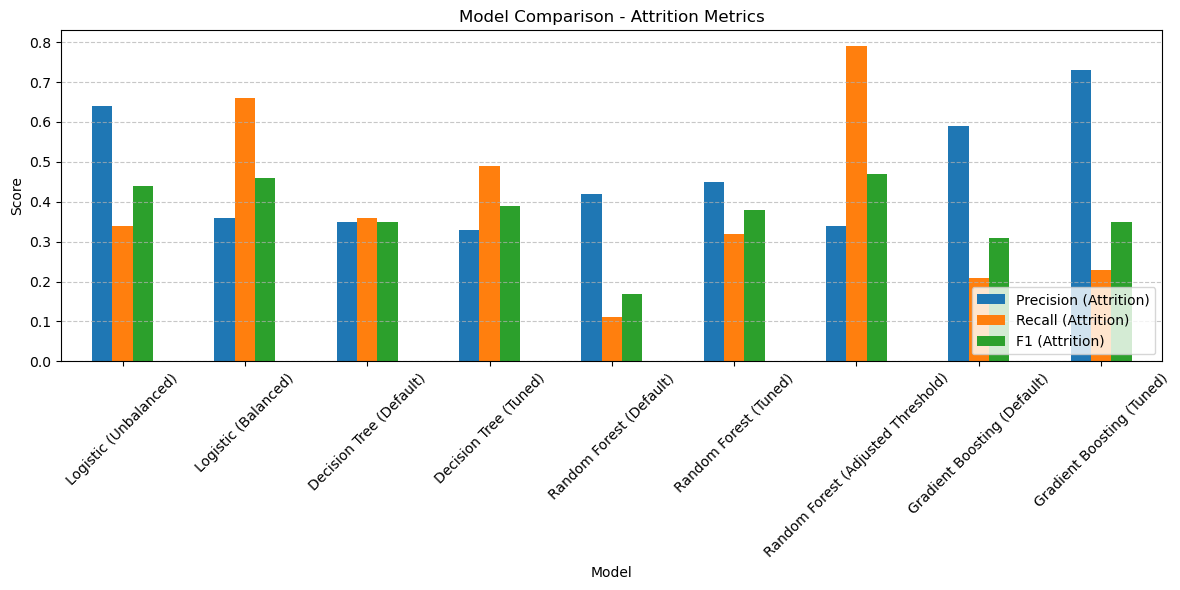

In [18]:
# index the df for easy plotting
df_plot = results_df.set_index('Model')

df_plot[['Precision (Attrition)',
         'Recall (Attrition)',
         'F1 (Attrition)']].plot(kind='bar', figsize=(12,6))

plt.title('Model Comparison - Attrition Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

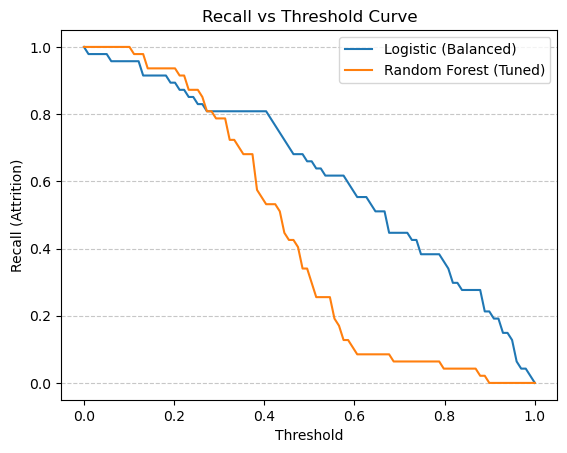

In [19]:
# Get predicted probabilities
from sklearn.metrics import recall_score
probs_log_bal = logreg_balanced.predict_proba(X_test_scaled)[:, 1]
probs_rf_tuned = rf_tuned.predict_proba(X_test_unscaled)[:, 1]

# Define threshold range
thresholds = np.linspace(0.0, 1.0, 100)

recall_log = []
recall_rf = []

# Compute recall at different thresholds
for t in thresholds:
    preds_log = np.where(probs_log_bal > t, 1, 0)
    preds_rf = np.where(probs_rf_tuned > t, 1, 0)

    recall_log.append(recall_score(y_test, preds_log))
    recall_rf.append(recall_score(y_test, preds_rf))

# Plot single chart
plt.figure()
plt.plot(thresholds, recall_log, label='Logistic (Balanced)')
plt.plot(thresholds, recall_rf, label='Random Forest (Tuned)')

plt.xlabel('Threshold')
plt.ylabel('Recall (Attrition)')
plt.title('Recall vs Threshold Curve')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Recall vs Threshold Analysis**

To further evaluate model behaviour, recall was plotted against different probability thresholds for both the balanced Logistic Regression and the tuned Random Forest models.

The curve shows how recall changes as the classification threshold increases. As expected, recall decreases as the threshold becomes more strict. At lower thresholds, the model classifies more employees as at risk, increasing recall but also increasing false positives.

**From the curve:**

The Random Forest model maintains higher recall at lower thresholds, demonstrating stronger flexibility when the threshold is adjusted.

The Logistic Regression model shows a steadier decline in recall as the threshold increases.

At the default threshold (0.5), Logistic Regression achieves higher recall than Random Forest.

However, when the threshold is lowered, Random Forest surpasses Logistic Regression in recall.

This visual analysis confirms that threshold adjustment significantly enhances the Random Forest model’s ability to detect attrition cases. Since the project prioritizes minimizing missed attrition cases, this supports the decision to select the tuned Random Forest model with an adjusted threshold as the final model.

### **Final Model Selection**

After evaluating multiple classification models, including Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting, the tuned Random Forest model with an adjusted classification threshold was selected as the final model.

Although some models achieved higher overall accuracy, the primary objective of this project was to correctly identify employees at risk of attrition. Since missing a high-risk employee is more costly than raising a false alarm, recall for the attrition class was prioritised.

The adjusted Random Forest model achieved the highest recall among all evaluated models, meaning it correctly identified the largest proportion of employees who left. While this came at the cost of lower overall accuracy and increased false positives, the trade-off aligns with the stated project objective of improving minority class detection.

For these reasons, the tuned Random Forest with threshold adjustment was chosen as the final model.

C:\Users\DELL\AppData\Local\Temp\ipykernel_21368\3485368526.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


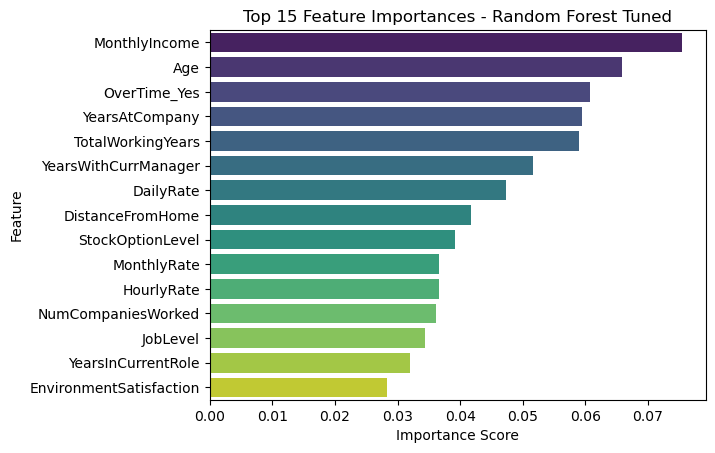

In [20]:
# checking the feature importance of ourchosen model
# Extract feature importance
importances = rf_tuned.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train_unscaled.columns,
    'Importance': importances
})

# Sort descending
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

# Show top 15 features
top_features = feature_importance_df.head(15)

# Plot
plt.figure()
sns.barplot(
    data=top_features,
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances - Random Forest Tuned')
plt.show()

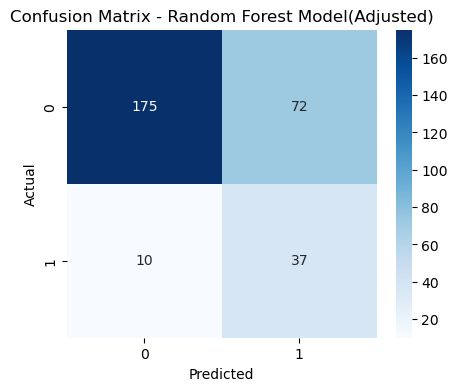

In [21]:
# confusion matrix for the chosen model
cm = confusion_matrix(y_test, y_pred_rf_adjusted)

plt.figure(figsize=(5,4))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Model(Adjusted)')
plt.show()

## **ERROR REVIEW**

In [22]:
threshold = 0.3

# Get probabilities
probs_rf = rf_tuned.predict_proba(X_test_unscaled)[:, 1]

# Apply threshold
y_pred_adjusted = np.where(probs_rf > threshold, 1, 0)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[175  72]
 [ 10  37]]


In [23]:
# Convert to DataFrame for easier analysis
test_results = X_test_unscaled.copy()
test_results['Actual'] = y_test.values
test_results['Predicted'] = y_pred_adjusted

# False Positives (Predicted 1, Actually 0)
false_positives = test_results[
    (test_results['Actual'] == 0) &
    (test_results['Predicted'] == 1)
]

# False Negatives (Predicted 0, Actually 1)
false_negatives = test_results[
    (test_results['Actual'] == 1) &
    (test_results['Predicted'] == 0)
]

print('False Positives:', false_positives.shape[0])
print('False Negatives:', false_negatives.shape[0])

False Positives: 72
False Negatives: 10


## **Error Analysis**

To better understand model performance, the prediction errors were examined using the confusion matrix.

The final Random Forest model (with adjusted threshold) significantly reduced the number of false negatives. This means fewer employees who actually left were missed by the model. Since the project prioritises identifying high-risk employees, this is an important improvement.

However, the model produces more false positives. Some employees are flagged as at risk even though they did not leave. While this lowers overall accuracy, it reflects a deliberate trade-off in favour of higher recall.

Overall, the error pattern aligns with the project objective: it is better to identify more potentially at-risk employees, even if some predictions are incorrect, than to miss employees who are likely to leave.

## **ROC-AUC**

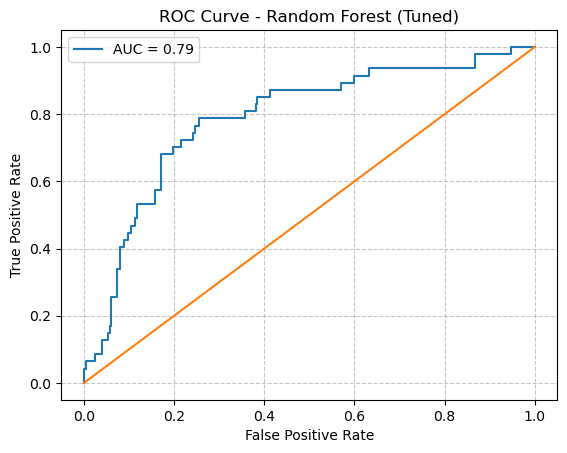

ROC-AUC Score: 0.788


In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for class 1
probs_rf = rf_tuned.predict_proba(X_test_unscaled)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, probs_rf)

# Compute AUC score
auc_score = roc_auc_score(y_test, probs_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1])  # Diagonal reference line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Tuned)')
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

print('ROC-AUC Score:', round(auc_score, 3))

ROC–AUC Evaluation

To further evaluate model performance, the Receiver Operating Characteristic (ROC) curve was plotted for the selected Random Forest model.

The ROC curve illustrates the trade-off between true positive rate (recall) and false positive rate across different classification thresholds. The model achieved an AUC score of approximately 0.79, indicating good overall class separation ability.

An AUC close to 0.8 suggests that the model is reasonably effective at distinguishing between employees who left and those who stayed. While not perfect, it demonstrates meaningful predictive power beyond random guessing.

This result supports the earlier findings that the selected model provides a strong balance between detection capability and overall classification performance.